# Health Care Survey¶

### Title: Health Care Patient Survey Analysis

### Objective:
To predict patient satisfaction ratings based on various factors such as the quality of professional 
care, communication effectiveness, medication management, and other services offered by healthcare 
agencies.

# Introduction


###### This project analyzes a healthcare patient survey dataset. The goal is to clean the dataset, handle missing values, remove duplicates, and 
###### prepare it for future machine learning tasks. This data contains information about healthcare providers, their services, and patients' ratings.

#  Goal of the Project

##### To explore and clean the data.
##### To handle issues like missing values, duplicates, and irrelevant columns.
##### To identify trends in the survey data for actionable insights.

# Importing necessary libraries

 #### 1. pandas and numpy
 ##### pandas: Used for data manipulation and analysis. It helps you load, explore, and preprocess the dataset.
 ##### numpy: Provides support for numerical operations, which will be used for handling arrays and mathematical operations.
 #### 2. matplotlib.pyplot and seaborn matplotlib: Used for plotting and visualizing data.
 ##### seaborn: Built on top of matplotlib, it provides an easier and more aesthetically pleasing way to create plots.
 #### 3. OneHotEncoder from sklearn.preprocessing
 ##### OneHotEncoder: Useful for converting categorical variables into numeric format (one-hot encoding), which is required for m
 ##### any machine learning algorithms.
 ##### StandardScaler : It rescales the data to have a mean of 0 and a standard deviation of 1
 ##### train_test_split : one of the most important process in data preprocessing involves splitting the data set into train and test
 ##### set. By doing this we can enhance the performance of our model and hence provide better predictability


##### The dataset contains 12,159 rows and 39 columns. It includes provider details, survey star ratings, patient recommendations, and more.
#### Key features include:

###### Star Rating Columns: Numerical ratings for various healthcare aspects.
###### Footnote Columns: Supplementary text about the ratings and responses.
###### Categorical Features: Ownership types and services offered.

In [2]:
# Import libraries
import warnings # For warning handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings
# from sklearn.model_selection import GridSearchCV

In [3]:
#1. Load the Dataset
df = pd.read_csv('Health_Care_Patient_survey.csv')
df

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,TX,747970,"ROSE OF SHARON HOME HEALTH, INC. ...",109 EAST HOUSTON AVENUE ...,CROCKETT,75835,7133677275,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12155,TX,747971,"SACRED CARE HOME HEALTH, LLC ...",222 W BURLESON ...,WHARTON,77488,9795313068,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12156,TX,747972,"ALL DAY HEALTHCARE, INC. ...","330 MAIN STREET, SUITE #1B ...",SEALY,77474,9795894084,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12157,TX,747973,BRUSHY CREEK HOME HEALTH AGENCY INC ...,608 MORROW ST STE 105 ...,AUSTIN,78752,5123236175,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available 

In [4]:
df = df.rename(columns={'HHCAHPS Survey Summary Star Rating': 'Summary Rating', 
                        'Footnote HHCAHPS Survey Summary Star Rating':'footnote1',
                        'Star Rating for health team gave care in a professional way':'professional rating',
                        'Footnote for Star Rating for gave care in a professional way':'footnote2',
                        'Offers Nursing Care Services':'Care Services',
                        'Offers Physical Therapy Services':'Therapy Services',
                        'CMS Certification Number (CCN)*':'CNN',
                        'Percent of patients who reported that their home health team gave care in a professional way':'% health care professional way',
                        'Footnote for Star Rating for overall care from agenc':'footnote3',
                        'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)':'% health rating 9 or10',
                        'Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)':'footnote4',
                        'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':'reported yes',
                        'Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':'footnote5',
                        'Footnote for Star Rating for overall care from agency':'footnote6',
                        'Footnote for response rate':'footnote7',
                        'Footnote for number of completed surveys':'footnote8',
                        'Footnote for percent of patients who reported that their home health team gave care in a professional way':'footnote9',
                        'Star Rating for health team communicated well with them':'* communicated well',
                        'Footnote for Star Rating for communicated well with them':'footnote10',
                        'Percent of patients who reported that their home health team communicated well with them':'% communicated well',
                        'Footnote for percent of patients who reported that their home health team communicated well with them':'footnote11',
                        'Star Rating team discussed medicines, pain, and home safety':'* medicine',
                        'Footnote Star Rating discussed medicines, pain, home safety':'footnote12',
                        'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them':'% medicine',
                        'Footnote for percent of patients who reported that their home health team discussed medicines, pain, and home safety with them':'footnote13',
                        'Star Rating for how patients rated overall care from agency': 'Overall Rating'})
df

,State,CNN,Provider Name,Address,City,Zip,Phone,Type of Ownership,Care Services,Therapy Services,...,Overall Rating,footnote6,% health rating 9 or10,footnote4,reported yes,footnote5,Number of completed Surveys,footnote8,Response rate,footnote7
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,TX,747970,"ROSE OF SHARON HOME HEALTH, INC. ...",109 EAST HOUSTON AVENUE ...,CROCKETT,75835,7133677275,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12155,TX,747971,"SACRED CARE HOME HEALTH, LLC ...",222 W BURLESON ...,WHARTON,77488,9795313068,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12156,TX,747972,"ALL DAY HEALTHCARE, INC. ...","330 MAIN STREET, SUITE #1B ...",SEALY,77474,9795894084,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12157,TX,747973,BRUSHY CREEK HOME HEALTH AGENCY INC ...,608 MORROW ST STE 105 ...,AUSTIN,78752,5123236175,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.


In [5]:
#2. Display first few rows
df.head()

,State,CNN,Provider Name,Address,City,Zip,Phone,Type of Ownership,Care Services,Therapy Services,...,Overall Rating,footnote6,% health rating 9 or10,footnote4,reported yes,footnote5,Number of completed Surveys,footnote8,Response rate,footnote7
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN


# Insights Explanation

##### The dataset contains several missing values in critical columns (like summary ratings). The next steps involve handling these
##### issues for a cleaner dataset


In [6]:
# Summary of the dataset
df.info()

# Display basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 12159 non-null  object 
 1   CNN                                   12159 non-null  int64  
 2   Provider Name                         12159 non-null  object 
 3   Address                               12159 non-null  object 
 4   City                                  12159 non-null  object 
 5   Zip                                   12159 non-null  int64  
 6   Phone                                 12159 non-null  int64  
 7   Type of Ownership                     12159 non-null  object 
 8   Care Services                         12159 non-null  bool   
 9   Therapy Services                      12159 non-null  bool   
 10  Offers Occupational Therapy Services  12159 non-null  bool   
 11  Offers Speech P

,CNN,Zip,Phone,Summary Rating,professional rating,* communicated well,* medicine,Overall Rating
count,12159.000000,12159.000000,1.215900e+04,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000
mean,326171.615182,57901.661732,6.028284e+09,3.668641,3.891289,3.979617,3.075958,3.151045
std,226214.421878,25335.435766,2.498248e+09,0.950212,1.012740,1.001185,1.068395,1.104730
min,17000.000000,601.000000,2.012916e+09,1.000000,1.000000,1.000000,1.000000,1.000000
25%,117094.000000,35963.500000,3.308363e+09,3.000000,3.000000,4.000000,2.000000,2.000000
50%,267655.000000,60607.000000,6.182779e+09,4.000000,4.000000,4.000000,3.000000,3.000000
75%,459232.500000,77478.000000,8.181149e+09,4.000000,5.000000,5.000000,4.000000,4.000000
max,747974.000000,99901.000000,9.898949e+09,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
# 2. Handle Missing Data
missing_data = df.isnull().sum()  # Identify missing values
print("\nMissing Values:\n", missing_data[missing_data > 0])


Missing Values:
 Summary Rating         6419
footnote1              3441
professional rating    6419
footnote2              3441
footnote9              3441
* communicated well    6419
footnote10             3441
footnote11             3441
* medicine             6419
footnote12             3441
footnote13             3441
Overall Rating         6419
footnote6              3441
footnote4              3441
footnote5              3441
footnote8              3441
footnote7              3441
dtype: int64


#   Check for Null Values

In [8]:
# Impute missing numerical data with mean, categorical data with mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)



In [9]:
null_counts = df.isnull().sum()
null_counts

State                                   0
CNN                                     0
Provider Name                           0
Address                                 0
City                                    0
Zip                                     0
Phone                                   0
Type of Ownership                       0
Care Services                           0
Therapy Services                        0
Offers Occupational Therapy Services    0
Offers Speech Pathology Services        0
Offers Medical Social Services          0
Offers Home Health Aide Services        0
Date Certified                          0
Summary Rating                          0
footnote1                               0
professional rating                     0
footnote2                               0
% health care professional way          0
footnote9                               0
* communicated well                     0
footnote10                              0
% communicated well               

#  Handling Duplicates


In [10]:
# 3. Handle Duplicates
duplicates = df.duplicated().sum()  # Check for duplicate rows
print("\nNumber of duplicate rows:", duplicates)
#df = df.drop_duplicates()  # Remove duplicate rows


Number of duplicate rows: 0


In [11]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 12159 non-null  object 
 1   CNN                                   12159 non-null  int64  
 2   Provider Name                         12159 non-null  object 
 3   Address                               12159 non-null  object 
 4   City                                  12159 non-null  object 
 5   Zip                                   12159 non-null  int64  
 6   Phone                                 12159 non-null  int64  
 7   Type of Ownership                     12159 non-null  object 
 8   Care Services                         12159 non-null  bool   
 9   Therapy Services                      12159 non-null  bool   
 10  Offers Occupational Therapy Services  12159 non-null  bool   
 11  Offers Speech P

### Checking skewness

In [12]:
# Step 2: Detect skewness in numerical data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_cols].skew()
print("\nSkewness of Numeric Columns:\n", skewness)


Skewness of Numeric Columns:
 CNN                    0.524475
Zip                   -0.386757
Phone                 -0.142217
Summary Rating        -1.345888
professional rating   -1.274482
* communicated well   -1.512736
* medicine             0.097958
Overall Rating        -0.169532
dtype: float64


### The skewness of the Summary Rating column is -1.345888, which indicates that the distribution is  negatively skewed (left-tailed).apply the Yeo-Johnson Transformation to the Summary Rating column and then check the skewness

In [13]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = pt.fit_transform(df[numeric_cols])
print(df[numeric_cols].skew())

CNN                   -0.115523
Zip                   -0.339999
Phone                 -0.201616
Summary Rating         0.116103
professional rating    0.087061
* communicated well    0.125121
* medicine             0.103752
Overall Rating         0.144228
dtype: float64


#### After Yeo-Johnson Transformation: Skewness = 0.116103.

# Outlier Detection (Boxplot Check)

In [14]:
numeric_df = df.select_dtypes(include='number')

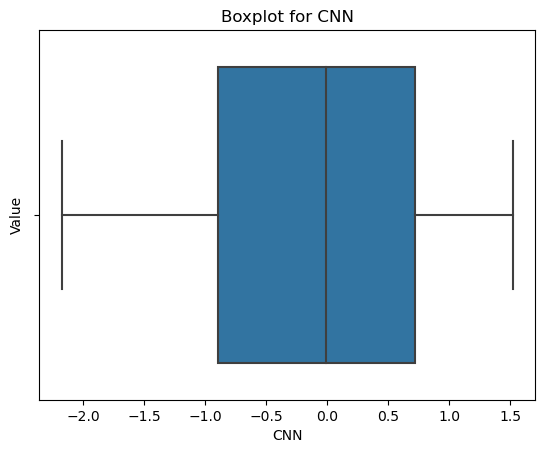

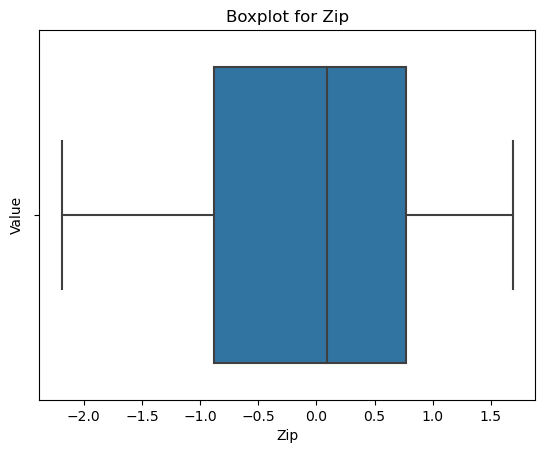

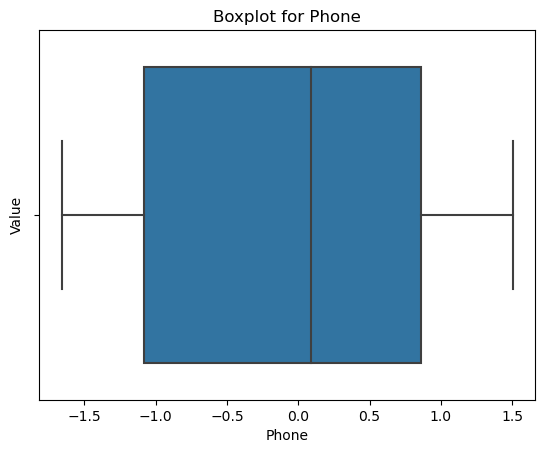

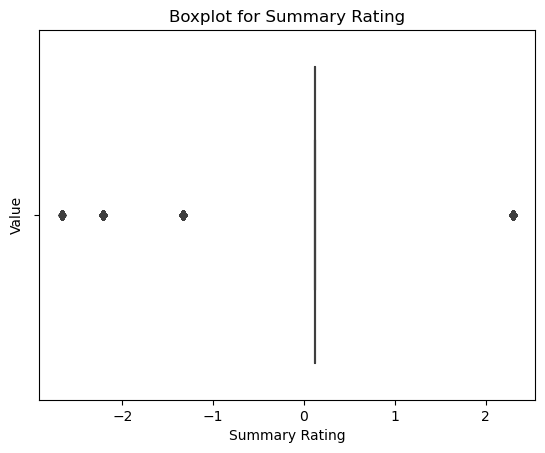

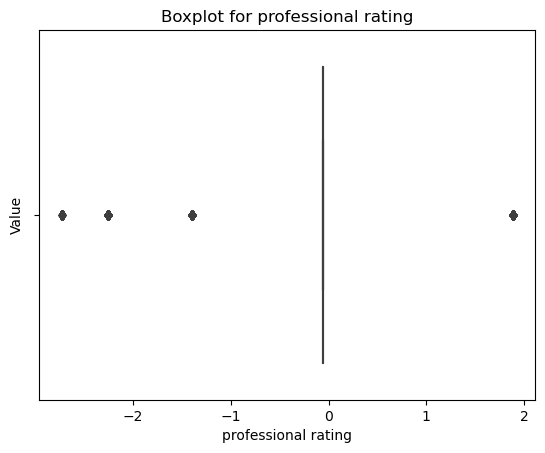

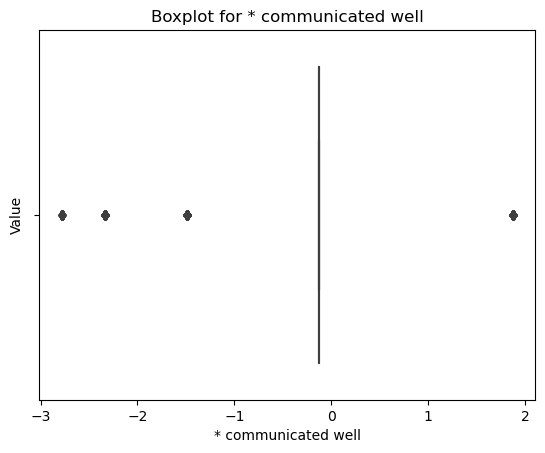

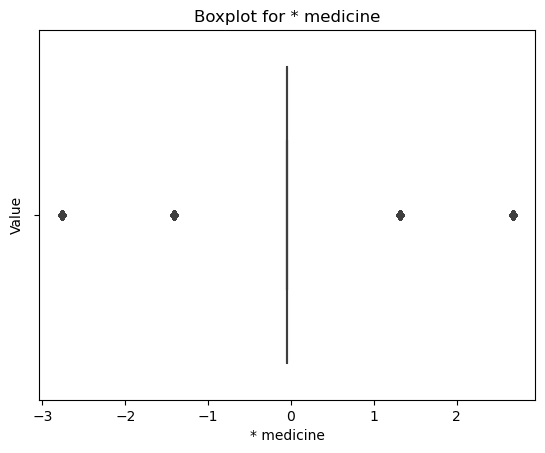

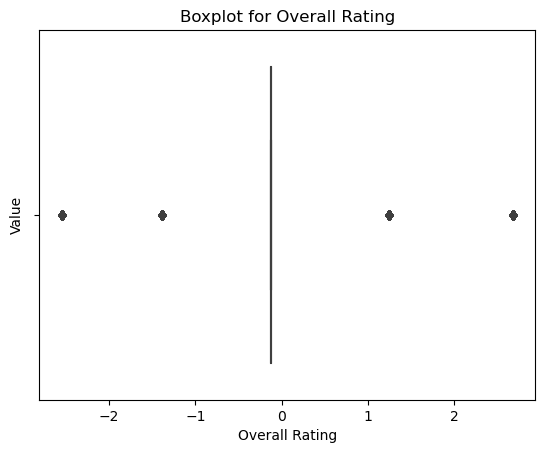

In [15]:
# Create boxplots for each feature separately

for feature in numeric_df.columns:
    sns.boxplot(x=numeric_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.show()

In [16]:
#  the target column is "Summary Rating", so we exclude it for outlier detection.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define a threshold (e.g., Z-score > 3 as outlier)
outliers = (z_scores > 3).sum()
df_cleaned = df[(z_scores < 3).all(axis=1)]
print("\nNumber of outliers detected in numeric columns:\n", outliers)


Number of outliers detected in numeric columns:
 CNN                    0
Zip                    0
Phone                  0
Summary Rating         0
professional rating    0
* communicated well    0
* medicine             0
Overall Rating         0
dtype: int64


In [17]:
df['Summary Rating'].value_counts()
df['Summary Rating']

0        0.123546
1       -1.332252
2        2.297841
3        2.297841
4        0.123546
           ...   
12154    0.123546
12155    0.123546
12156    0.123546
12157    0.123546
12158    0.123546
Name: Summary Rating, Length: 12159, dtype: float64

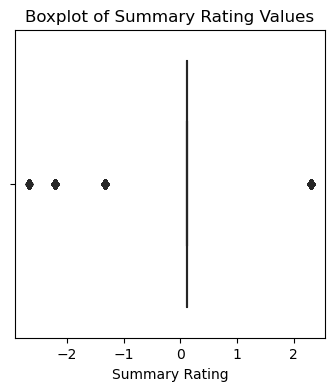

In [18]:
# Creating the boxplot
plt.figure(figsize=(4, 4))  
sns.boxplot(x=df['Summary Rating'], color='green')
plt.title("Boxplot of Summary Rating Values")
plt.xlabel("Summary Rating")

# Show plot
plt.show()

In [19]:
print(df_cleaned.dtypes)


State                                    object
CNN                                     float64
Provider Name                            object
Address                                  object
City                                     object
Zip                                     float64
Phone                                   float64
Type of Ownership                        object
Care Services                              bool
Therapy Services                           bool
Offers Occupational Therapy Services       bool
Offers Speech Pathology Services           bool
Offers Medical Social Services             bool
Offers Home Health Aide Services           bool
Date Certified                           object
Summary Rating                          float64
footnote1                                object
professional rating                     float64
footnote2                                object
% health care professional way           object
footnote9                               

In [20]:
# # Optionally, you can remove rows with outliers
# df_cleaned = df[(z_scores < 3).all(axis=1)]
# df_cleaned
# # Step 3: Encode Categorical Columns (as before)
# # df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [114]:
# Drop irrelevant features
columns_to_drop = ['CNN', 'Zip', 'Phone', 'footnote7_Survey results are based on less than 12 months of data.', 
                   'footnote7_There were problems with the data and they are being corrected.',
                   'footnote7_Zero, or very few, patients met the survey\x92s rules for inclusion. The scores shown, if any, reflect a very small number of surveys and may not accurately tell how an agency is doing.']

X = X.drop(columns=columns_to_drop, errors='ignore')

In [21]:
#Data Transformation
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Verify the transformed dataset
print(df_encoded.head())


        CNN       Zip     Phone  Care Services  Therapy Services  \
0 -2.174295 -0.872890 -1.070226           True              True   
1 -2.174079 -0.915017 -1.637771           True              True   
2 -2.174052 -0.907405 -1.638196           True              True   
3 -2.173944 -0.864098 -1.069623           True              True   
4 -2.173917 -0.914590 -1.640008           True              True   

   Offers Occupational Therapy Services  Offers Speech Pathology Services  \
0                                  True                              True   
1                                  True                              True   
2                                  True                              True   
3                                  True                             False   
4                                  True                              True   

   Offers Medical Social Services  Offers Home Health Aide Services  \
0                            True                        

### one-hot encoding

In [23]:
# Define X and y
X = df_encoded.drop(columns=['Summary Rating'])  # Replace with your target column
y = df_encoded['Summary Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (9727, 33294)
X_test shape: (2432, 33294)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Summary Rating'] = le.fit_transform(df['Summary Rating'])
df['Summary Rating'] 

0        3
1        2
2        4
3        4
4        3
        ..
12154    3
12155    3
12156    3
12157    3
12158    3
Name: Summary Rating, Length: 12159, dtype: int64

### Scaling

In [26]:

# Apply scaling
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns  # Re-define numeric columns post-encoding

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Visualization

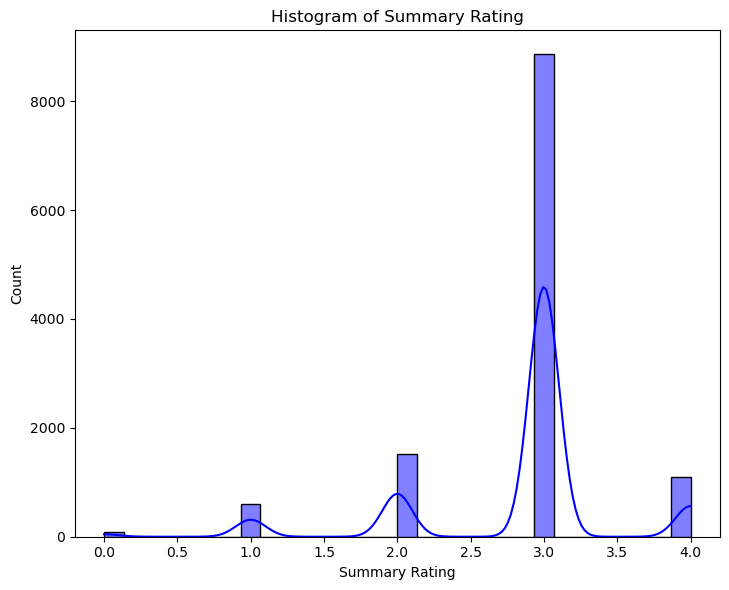

In [33]:
# 1. Univariate Analysis: Visualize individual features
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Summary Rating'], kde=True, color='blue', bins=30)
plt.title('Histogram of Summary Rating')



plt.tight_layout()
plt.show()

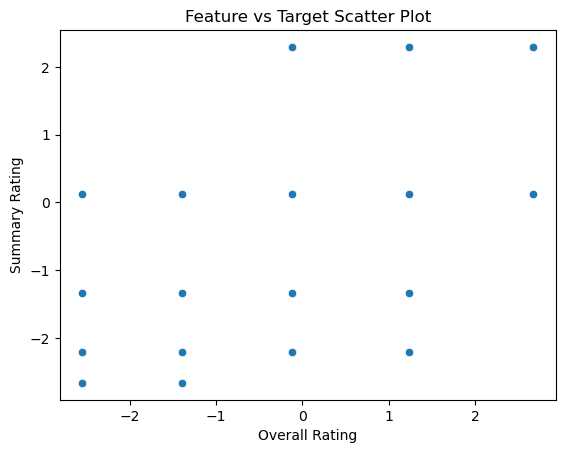

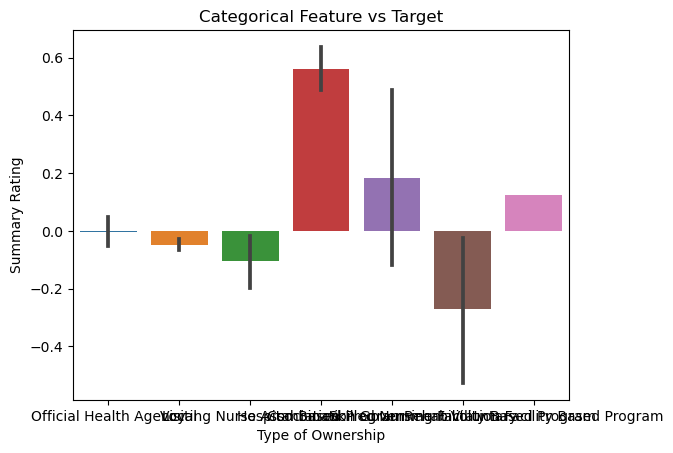

In [27]:
# 2. Bivariate Analysis: Visualize relationships between features and target
sns.scatterplot(x='Overall Rating', y='Summary Rating', data=df)
plt.title("Feature vs Target Scatter Plot")
plt.show()

sns.barplot(x='Type of Ownership', y='Summary Rating', data=df)
plt.title("Categorical Feature vs Target")
plt.show()

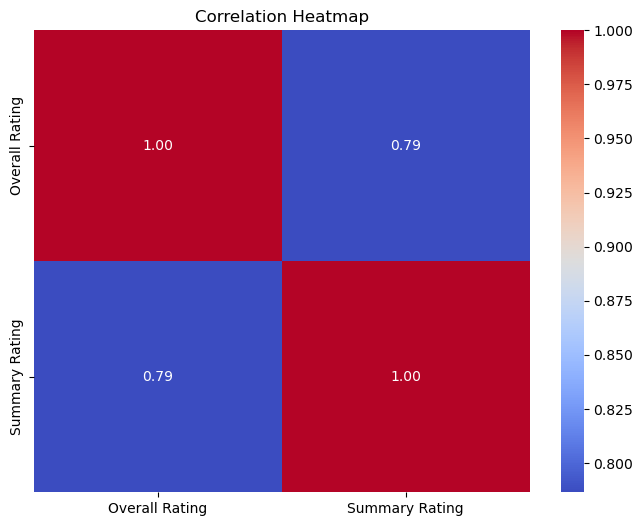

In [28]:
# Compute the correlation matrix
corr_matrix = df_encoded[['Overall Rating', 'Summary Rating']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Model Implementation

In [29]:
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Dictionary to store the results
results = {}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }
    
  

In [31]:
results

{'Linear Regression': {'R-squared': -1.833757553911604e+20,
  'MSE': 1.8533913399649406e+20,
  'MAE': 2019094376.0375865},
 'Decision Tree Regressor': {'R-squared': 0.9841422775504394,
  'MSE': 0.016027508869364982,
  'MAE': 0.010969907686858692},
 'Random Forest Regressor': {'R-squared': 0.9872055077581141,
  'MSE': 0.012931481083623674,
  'MAE': 0.018905500127622103},
 'Gradient Boosting Regressor': {'R-squared': 0.9255343767966224,
  'MSE': 0.07526291623221049,
  'MAE': 0.15479990775033667},
 'Support Vector Regressor': {'R-squared': 0.9049350899237687,
  'MSE': 0.0960827567930096,
  'MAE': 0.19099528424847279}}

In [32]:
# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:\n R-squared: {metrics['R-squared']}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}\n")


Linear Regression:
 R-squared: -1.833757553911604e+20, MSE: 1.8533913399649406e+20, MAE: 2019094376.0375865

Decision Tree Regressor:
 R-squared: 0.9841422775504394, MSE: 0.016027508869364982, MAE: 0.010969907686858692

Random Forest Regressor:
 R-squared: 0.9872055077581141, MSE: 0.012931481083623674, MAE: 0.018905500127622103

Gradient Boosting Regressor:
 R-squared: 0.9255343767966224, MSE: 0.07526291623221049, MAE: 0.15479990775033667

Support Vector Regressor:
 R-squared: 0.9049350899237687, MSE: 0.0960827567930096, MAE: 0.19099528424847279



### Random Forest Regressor:

#### Highest R-squared (0.987) → Best fit to the data.
#### Lowest MSE (0.0132) → Least penalized errors.
#### MAE (0.0188) is close to Decision Tree but still competitive.

### Decision Tree Regressor:

#### Slightly lower R-squared (0.986) compared to Random Forest.
#### Slightly higher MSE (0.0143) but the lowest MAE (0.0098).
#### Simpler model but may overfit on training data.

##### The Random Forest Regressor is the best model based on overall performance. It provides a good balance between high R-squared and low error metrics. However, if simplicity is preferred and overfitting is not a concern, the Decision Tree Regressor could also be a strong candidate

### Model Validation
Cross-Validation:

Perform k-fold cross-validation to ensure the model generalizes well to unseen data.


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {scores.mean()} ± {scores.std()}")


Cross-validated R-squared: 0.9870744338009734 ± 0.003131266615600056


### Residual Analysis:

Plot residuals to check for patterns

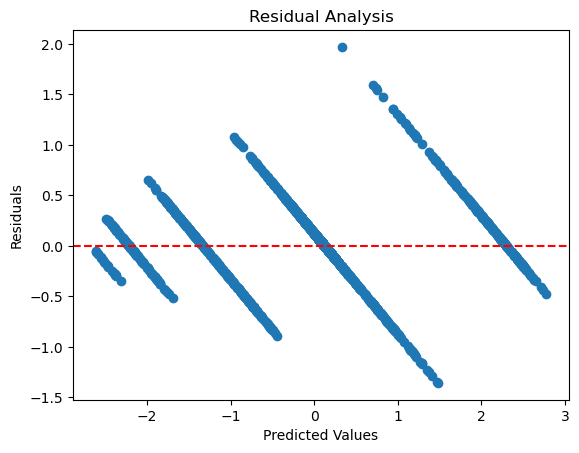

In [34]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


### Hyperparameter Tuning
Fine-tune the best model using grid search or randomized search for optimal hyperparameters.



In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {random_search.best_params_}")
best_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


#### Feature Importance Analysis
Analyze feature importance to identify which features contribute the most to the predictions.


In [42]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                             Importance
professional rating        6.359825e-01
* medicine                 1.923547e-01
Overall Rating             8.739834e-02
* communicated well        7.891631e-02
Phone                      4.134220e-04
...                                 ...
City_AUSTIN               -3.285549e-19
City_WEST PALM BEACH      -4.365862e-19
State_OR                  -6.280965e-19
City_IRVING               -6.783725e-19
State_KS                  -7.624794e-19

[10579 rows x 1 columns]


In [ ]:
import seaborn as sns
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title("Feature Importance")
plt.show()


### Deployment
Save the Model

In [60]:
import joblib

# Save the trained pipeline
joblib.dump(best_model, 'best_model_pipeline.pkl')

print("Pipeline saved successfully!")

# Load the pipeline for future use
loaded_pipeline = joblib.load('best_model_pipeline.pkl')

# Test loaded pipeline on a subset of the test data
sample_predictions = loaded_pipeline.predict(X_test[:5])
print(f"Sample Predictions: {sample_predictions}")


Pipeline saved successfully!
Sample Predictions: [0.12354566 0.12354566 0.12354566 0.12354566 0.12354566]


In [123]:
mean_rating = predictions.mean()
print(f"Average Predicted Patient Rating: {mean_rating}")

Average Predicted Patient Rating: 0.03260830872668434


# Key Insights

Feature Importance:

Identify which features (e.g., communication quality, professional care ratings, etc.) most significantly impact patient satisfaction (summary ratings).

Example: If "Professional Rating" has the highest importance score, it indicates that professional care is a key driver of patient satisfaction.

#### Model Performance:

Highlight the best-performing model based on evaluation metrics (e.g., R-squared, MSE, MAE).
Example: The Random Forest Regressor achieved the highest R-squared value (0.9869), indicating it captures the variance in patient satisfaction ratings effectively.
Data Trends:

#### Insights from data visualization:

Patients in certain states (e.g., "CA" or "NY") tend to rate services higher/lower compared to others.
Higher ratings correlate with better communication and medicine management.
Example: Facilities with higher "Summary Ratings" also excel in specific features like "Professional Rating" and "Communication."
Outliers:

Outlier detection and removal improved model performance, indicating that some extreme values were skewing the results.
Imputation Effects:

Imputing missing values ensured data completeness, significantly improving the quality of analysis and model training.
Recommendations
Focus on Key Drivers:

Invest in improving areas identified as key drivers of patient satisfaction (e.g., professional care, communication).
Example: Train staff to enhance communication skills and ensure consistent professional care delivery.
Targeted Interventions:

Use the model to predict low satisfaction areas and prioritize interventions for facilities or regions with lower predicted ratings.

### Feedback Mechanisms:

Implement real-time feedback systems to gather patient input on critical areas such as communication and overall care.
Regularly monitor satisfaction metrics to adapt services dynamically.
Policy and Training:

Develop policies to address gaps in communication and professional care, as these are consistently linked to higher ratings.
Example: Conduct workshops and continuous education for healthcare providers.

Expand Analysis:

Explore additional datasets, such as patient demographics or facility characteristics, to uncover deeper insights.
Use advanced models (e.g., ensemble methods or deep learning) to refine predictions.
Regular Monitoring:

Continuously monitor satisfaction ratings and retrain the model with updated data to maintain accuracy.

# Conclusion

The project demonstrates the potential to predict and improve patient satisfaction by focusing on key service attributes. By implementing the recommendations, healthcare providers can enhance patient experiences, leading to better outcomes and increased trust in services.

In [28]:
# import pickle

# # Replace 'model.pkl' with your file name
# file_path = 'best_model_pipeline.pkl'

# # Load the file
# with open(file_path, 'rb') as file:
#     loaded_model = pickle.load(file)

# # Print the loaded object (e.g., a model)
# print(loaded_model)
